In [6]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms, models
import torch.optim as optim
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
import random

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using", device)

Using cuda


In [7]:
transform = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])
train_data = datasets.CIFAR10(root ='/.data' , train=True , download=True , transform=transform)
train_loader = DataLoader(train_data , batch_size = 64 , shuffle=True)
test_data = datasets.CIFAR10(root='/.data' , train=False , download = True , transform = transform)
test_loader = DataLoader(test_data , batch_size = 64 , shuffle=False )

In [8]:
classes = train_data.classes
print(classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [9]:
model = models.resnet18(pretrained=True)
#for parameter in model.parameters():
#  parameter.requires_grad=False

model.fc = nn.Linear(model.fc.in_features,10)
model = model.to(device)

In [11]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)
epochs = 5
for epoch in range(epochs):
  train_loss , correct , total =0,0,0
  model.train()
  for images,labels in train_loader:
    images, labels =images.to(device),labels.to(device)
    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs,labels)
    loss.backward()
    optimizer.step()
    pred = torch.argmax(outputs , dim=1)
    train_loss += loss.item()
    total += labels.size(0)
    correct += (pred == labels).sum().item()
  acc = 100*(correct/total)
  print(f"Epoch :{epoch+1} ,Loss :{train_loss/len(train_loader)},Accuracy :{acc}")

Epoch :1 ,Loss :0.573816913682634,Accuracy :79.986
Epoch :2 ,Loss :0.562641302757251,Accuracy :80.49199999999999
Epoch :3 ,Loss :0.5606331212060226,Accuracy :80.598
Epoch :4 ,Loss :0.5516281752749477,Accuracy :80.866
Epoch :5 ,Loss :0.5491460183697283,Accuracy :80.67999999999999


In [12]:
model.eval()
correct , total =0,0
with torch.no_grad():
  for images, labels in test_loader:
    images, labels = images.to(device), labels.to(device)
    outputs = model(images)
    pred = torch.argmax(outputs, dim=1)
    total += labels.size(0)
    correct += (pred == labels).sum().item()

acc = 100*(correct/total)
print(f"Accuracy :{acc}")

Accuracy :80.38


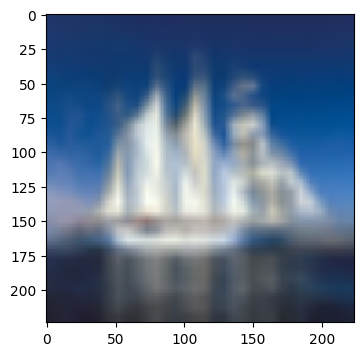

predicted :  ship  True :  ship


In [111]:
def imshow(img):
  img = img * 0.5 + 0.5
  npimg = img.numpy()
  plt.figure(figsize=(4,4))
  plt.imshow(np.transpose(npimg,(1,2,0)),interpolation = 'nearest')
  plt.show()

rand_input = random.randint(0,len(test_data)-1)
images,labels = test_data[rand_input]
imshow(images)
model.eval()
with torch.no_grad():
  images = images.unsqueeze(0).to(device)
  labels = torch.tensor([labels]).to(device)
  output = model(images)
  pred = torch.argmax(output, dim=1)
  print("predicted : ",classes[pred.item()] , " True : " ,classes[labels.item()])

In [83]:
torch.save(model.state_dict(), "cifar_resnet18.pth")